## Plotting with Histogram

In [2]:
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



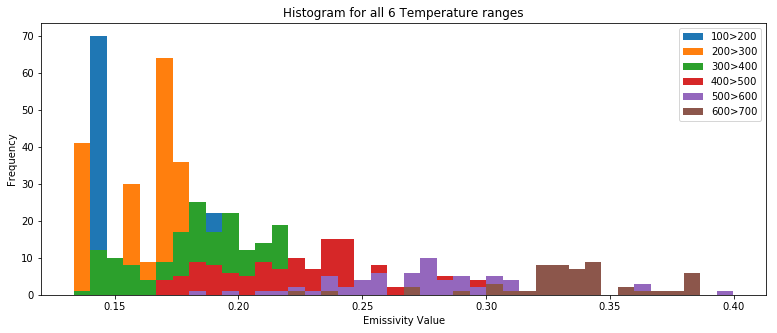

In [3]:
em = pd.read_csv('../data/Em_Values.csv',header=0)
%matplotlib inline
em.plot.hist( figsize=(13,5), bins = 40 ) #Histogram of all 6 temperature ranges 
plt.title("Histogram for all 6 Temperature ranges")
plt.xlabel("Emissivity Value")
#The counts for the first two temperature seem to be off, but correct in the individual plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11356ef28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113d213c8>]], dtype=object)

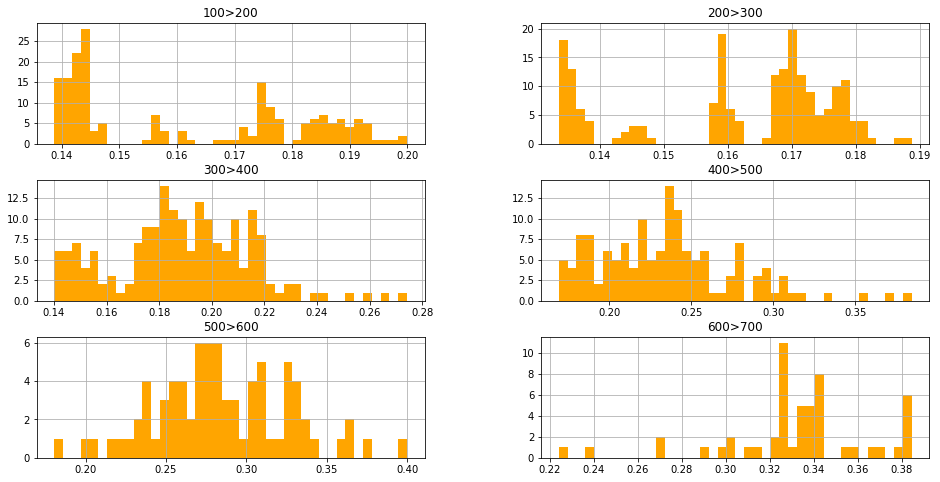

In [4]:
em.hist(color='orange', figsize=(16,8), bins=40)

In [4]:
data1 = np.array(em["100>200"].dropna()) #convert data frame to array and drop nan values 
data2 = np.array(em["200>300"].dropna())
data3 = np.array(em["300>400"].dropna())
data4 = np.array(em["400>500"].dropna())
data5 = np.array(em["500>600"].dropna())
data6 = np.array(em["600>700"].dropna())

## Probability density histogram

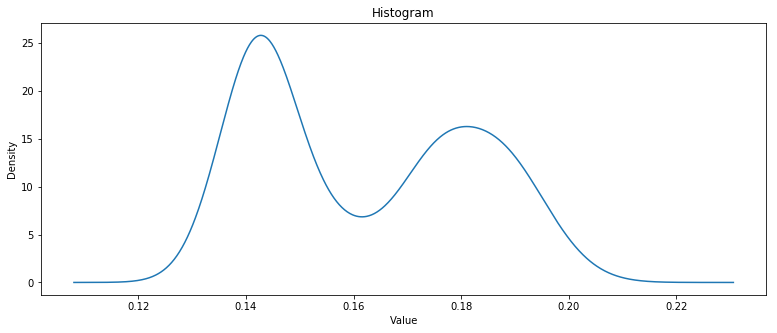

In [5]:
em['100>200'].plot(kind='density', figsize=(13,5))
plt.title("Histogram")
plt.xlabel("Value")
#This almost looks as if there are two peaks here. Tease this out with more advanced models. 

## Modeling the prior as Uniform Disribution and Likelihood as Normal

In [6]:
with pm.Model():
    # prior 
    em = pm.Uniform('em', 0, 1) 
    sigma = pm.Uniform('sigma', 0, 1) 
    
    # likelihood 
    returns = pm.Normal('returns', mu=em, sd = sigma,  observed=data1) 

    # Inference
    #start = find_MAP( ) # Find starting value by optimization
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(10000, step, tune=500)

NameError: name 'data1' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1223ab0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1224c8b00>]], dtype=object)

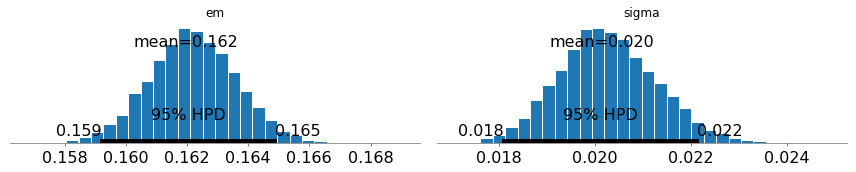

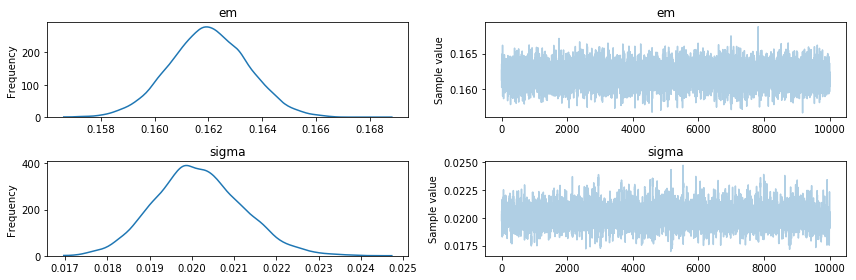

In [8]:
pm.plots.plot_posterior(trace)
pm.traceplot(trace)




em:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.162            0.001            0.000            [0.159, 0.165]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.159          0.161          0.162          0.163          0.165


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.020            0.001            0.000            [0.018, 0.022]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.018          0.019          0.020          0.021          0.022



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121d9f6d8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x1205cda90>]], dtype=object)

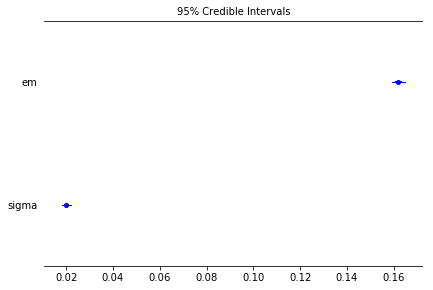

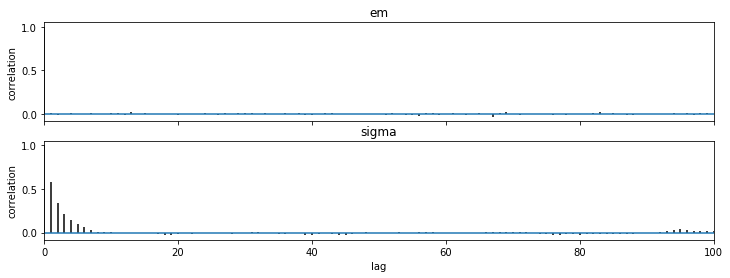

In [9]:
pm.summary(trace)
pm.plots.forestplot(trace)
pm.plots.autocorrplot(trace)

100%|██████████| 10500/10500 [00:17<00:00, 593.27it/s]



em:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.161            0.001            0.000            [0.159, 0.164]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.159          0.161          0.161          0.162          0.164


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.016            0.001            0.000            [0.014, 0.017]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.014          0.015          0.016          0.016          0.017



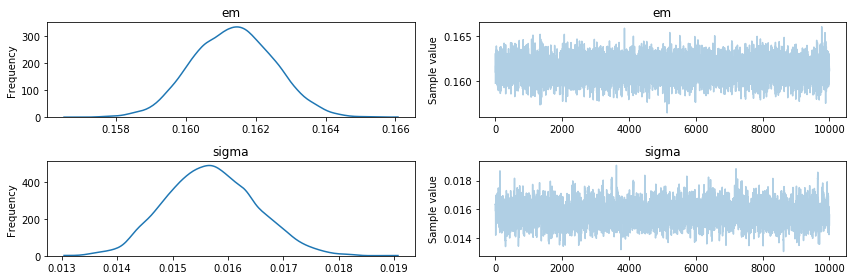

In [10]:
with pm.Model():
    # prior 
    em = pm.Uniform('em', 0, 1) 
    sigma = pm.Uniform('sigma', 0, 1) 
    
    # likelihood 
    returns = pm.Normal('returns', mu=em, sd = sigma,  observed=data2) 

    # Inference
    #start = find_MAP( ) # Find starting value by optimization
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(10000, step, tune=500)
    pm.summary(trace)
    pm.traceplot(trace)


100%|██████████| 10500/10500 [00:15<00:00, 698.42it/s]



em:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.189            0.002            0.000            [0.185, 0.193]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.185          0.188          0.189          0.190          0.193


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.026            0.001            0.000            [0.023, 0.029]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.024          0.025          0.026          0.027          0.029



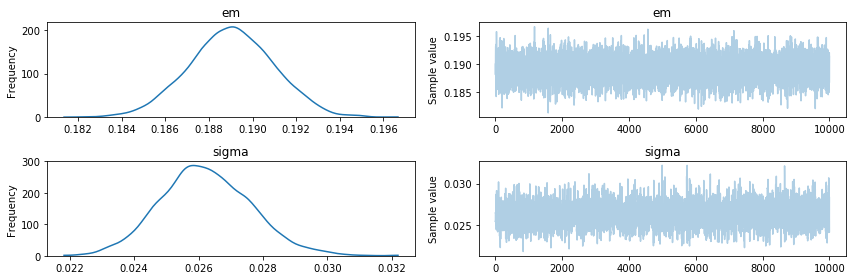

In [11]:
with pm.Model():
    # prior 
    em = pm.Uniform('em', 0, 1) 
    sigma = pm.Uniform('sigma', 0, 1) 
    
    # likelihood 
    returns = pm.Normal('returns', mu=em, sd = sigma,  observed=data3) 

    # Inference
    #start = find_MAP( ) # Find starting value by optimization
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(10000, step, tune=500)
    pm.summary(trace)
    pm.traceplot(trace)

100%|██████████| 10500/10500 [00:12<00:00, 813.20it/s]



em:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.235            0.004            0.000            [0.227, 0.242]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.228          0.232          0.235          0.237          0.242


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.042            0.003            0.000            [0.038, 0.048]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.038          0.041          0.042          0.044          0.048



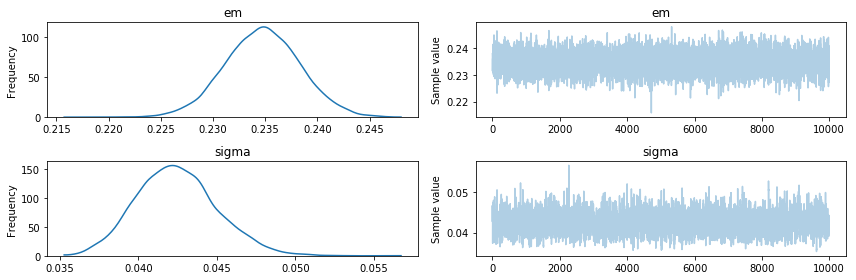

In [12]:
with pm.Model():
    # prior 
    em = pm.Uniform('em', 0, 1) 
    sigma = pm.Uniform('sigma', 0, 1) 
    
    # likelihood 
    returns = pm.Normal('returns', mu=em, sd = sigma,  observed=data4) 

    # Inference
    #start = find_MAP( ) # Find starting value by optimization
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(10000, step, tune=500)
    pm.summary(trace)
    pm.traceplot(trace)

100%|██████████| 10500/10500 [00:13<00:00, 771.04it/s]



em:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.285            0.005            0.000            [0.275, 0.294]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.275          0.282          0.285          0.288          0.295


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.043            0.003            0.000            [0.036, 0.049]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.036          0.040          0.042          0.045          0.050



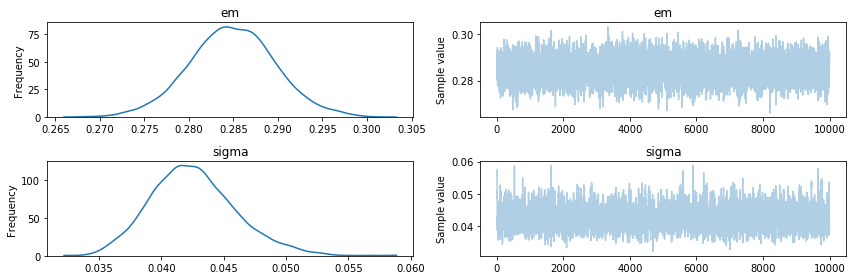

In [95]:
with pm.Model():
    # prior 
    em = pm.Uniform('em', 0, 1) 
    sigma = pm.Uniform('sigma', 0, 1) 
    
    # likelihood 
    returns = pm.Normal('returns', mu=em, sd = sigma,  observed=data5) 

    # Inference
    #start = find_MAP( ) # Find starting value by optimization
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(10000, step, tune=500)
    pm.summary(trace)
    pm.traceplot(trace)

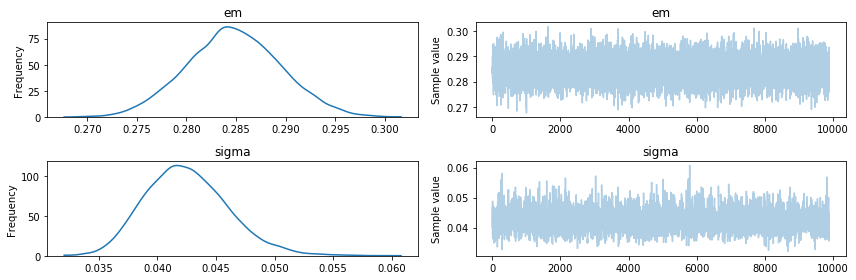

In [32]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();

In [93]:
ppc = pm.sample_ppc(trace, model=model, samples=100)

NameError: name 'model' is not defined